# IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import requests
import folium
import re
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize 

# 1. PRE-PROCESSING DATA

### LOAD THE DATA

In [62]:
#API DATA
CLIENT_ID = '' 
CLIENT_SECRET = '' 
VERSION = '20200605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [36]:
#NAME OF REGIONES
regiones = [
    "Aisén",
    "Antofagasta",
    "Arica y Parinacota",
    "Atacama",
    "Biobío",
    "Coquimbo",
    "La Araucanía",
    "Libertador General Bernardo O'Higgins",
    "Los Lagos",
    "Los Ríos",
    "Magallanes y de la Antártica Chilena",
    "Maule",
    "Santiago",
    "Ñuble",
    "Tarapacá",
    "Valparaíso"
]

In [38]:
#LOCATION OF CHILE
chile_address = "Chile"
geolocator = Nominatim(user_agent="foursaque")
chile_location = geolocator.geocode(chile_address)
chile_latitude, chile_longitude = chile_location.latitude, chile_location.longitude

In [39]:
#LOCATION OF REGIONES
locat = pd.DataFrame()
lat_list = []
lng_list = []
for region in regiones:
    address = "Región de {}, Chile".format(region)
    geolocator = Nominatim(user_agent="foursaque")
    location = geolocator.geocode(address)
    latitude, longitude = location.latitude, location.longitude

    lat_list.append(latitude)
    lng_list.append(longitude)

locat["Region"] = regiones
locat["Latitude"] = lat_list
locat["Longitude"] = lng_list

In [40]:
#CREATE THE MAP
map_regiones = folium.Map(location=(chile_latitude,chile_longitude), zoom_start=5)
#ADD MARKERS
for i in range(len(locat)):
    label = folium.Popup(
        html="{}".format(locat.iloc[i,0]),
        parse_html=True                         
    )

    folium.CircleMarker(
        location=(locat.iloc[i,1], locat.iloc[i,2]), 
        popup=label,
        radius=5 , 
        fill=True, 
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(map_regiones)
map_regiones

In [41]:
#COMPANIES
dic_companies = {}
for region in regiones:
    address = "Región de {}, Chile".format(region)
    geolocator = Nominatim(user_agent="foursaque")
    location = geolocator.geocode(address)
    latitude, longitude = location.latitude, location.longitude

    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 100000 # define radius

    query="web"
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        query,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()
    
    for j in range( len(results["response"]["venues"]) ):
        country = results["response"]["venues"][j]["location"]["country"]
        if country == "Chile":
            patron = re.compile(r'\b[Ww][Ee][Bb]')
            name =  results["response"]["venues"][j]["name"]
            if re.findall(patron,name):
                ID = results["response"]["venues"][j]["id"]
                add = results["response"]["venues"][j]["location"]["formattedAddress"][0]
                lat = results["response"]["venues"][j]["location"]["lat"]
                lng = results["response"]["venues"][j]["location"]["lng"]
                dic_companies[name] = [ID, add, lat, lng]

In [42]:
copy_dic_companies = dic_companies.copy()

In [43]:
df_companies = pd.DataFrame(copy_dic_companies).transpose()
df_companies

,0,1,2,3
Web Control MGSpA,507a945ae4b0ce42c6efd561,Chile,-23.4171,-68.7938
Web control,503ea128e4b034809af22a90,Chile,-22.4372,-68.9214
Graphix Web,510fc87ae4b0898fc1772f94,Chile,-22.4407,-68.923
Webcontrol,52f8dda011d27208a5b7c00f,Pasaje Provincia Del Canton SUR 3541,-22.451,-68.9471
Empresa WebControl,4ef0f60461afc4dca806cbf4,769 (Yerbas Buenas),-22.4768,-68.9191
...,...,...,...,...
asesoria web,4ec723337ee537da7e2d4862,"Warren Smith 47, Las Condes, Región Metropolitana",-33.4098,-70.5746
Tvn - Area Realizadores Web,504653d9e4b0852ff2464c24,"Bellavista 0990, 3er Piso",-33.4121,-70.5657
varrate.cl Web Services Ltda,4b6797dff964a520b0562be3,Apoquindo 6445,-33.4082,-70.5639
Posicionamiento Web SEO Chile,5b1a6ca1d1a402002c646428,Las Condes (Santiago),-33.4078,-70.5437


In [44]:
df_companies.reset_index(inplace=True)
df_companies

,index,0,1,2,3
0,Web Control MGSpA,507a945ae4b0ce42c6efd561,Chile,-23.4171,-68.7938
1,Web control,503ea128e4b034809af22a90,Chile,-22.4372,-68.9214
2,Graphix Web,510fc87ae4b0898fc1772f94,Chile,-22.4407,-68.923
3,Webcontrol,52f8dda011d27208a5b7c00f,Pasaje Provincia Del Canton SUR 3541,-22.451,-68.9471
4,Empresa WebControl,4ef0f60461afc4dca806cbf4,769 (Yerbas Buenas),-22.4768,-68.9191
...,...,...,...,...,...
84,asesoria web,4ec723337ee537da7e2d4862,"Warren Smith 47, Las Condes, Región Metropolitana",-33.4098,-70.5746
85,Tvn - Area Realizadores Web,504653d9e4b0852ff2464c24,"Bellavista 0990, 3er Piso",-33.4121,-70.5657
86,varrate.cl Web Services Ltda,4b6797dff964a520b0562be3,Apoquindo 6445,-33.4082,-70.5639
87,Posicionamiento Web SEO Chile,5b1a6ca1d1a402002c646428,Las Condes (Santiago),-33.4078,-70.5437


In [45]:
df_companies.rename(columns={"index":"Name", 0:"ID", 1:"Address", 2:"Latitude", 3:"Longitude"}, inplace=True)
df_companies

,Name,ID,Address,Latitude,Longitude
0,Web Control MGSpA,507a945ae4b0ce42c6efd561,Chile,-23.4171,-68.7938
1,Web control,503ea128e4b034809af22a90,Chile,-22.4372,-68.9214
2,Graphix Web,510fc87ae4b0898fc1772f94,Chile,-22.4407,-68.923
3,Webcontrol,52f8dda011d27208a5b7c00f,Pasaje Provincia Del Canton SUR 3541,-22.451,-68.9471
4,Empresa WebControl,4ef0f60461afc4dca806cbf4,769 (Yerbas Buenas),-22.4768,-68.9191
...,...,...,...,...,...
84,asesoria web,4ec723337ee537da7e2d4862,"Warren Smith 47, Las Condes, Región Metropolitana",-33.4098,-70.5746
85,Tvn - Area Realizadores Web,504653d9e4b0852ff2464c24,"Bellavista 0990, 3er Piso",-33.4121,-70.5657
86,varrate.cl Web Services Ltda,4b6797dff964a520b0562be3,Apoquindo 6445,-33.4082,-70.5639
87,Posicionamiento Web SEO Chile,5b1a6ca1d1a402002c646428,Las Condes (Santiago),-33.4078,-70.5437


In [46]:
#CREATE THE MAP OF REGIONES WITH COMPANIES
map_companies = folium.Map(location=(chile_latitude,chile_longitude), zoom_start=5)
#ADD MARKERS
for i in range(len(df_companies)):
    label = folium.Popup(
        html="{}".format(df_companies.Address[i]),
        parse_html=True                         
    )

    folium.CircleMarker(
        location=(df_companies.loc[i,"Latitude"], df_companies.loc[i,"Longitude"]), 
        popup=label,
        radius=5 , 
        fill=True, 
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(map_companies)
map_companies

In [47]:
dic_premium = {}
for row in df_companies.values:
    ID = row[1] #ID value
    url_premium = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
        ID,
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION)
    results = requests.get(url_premium).json()
    dic_premium[row[0]] = results

In [93]:
#dic_premium

In [49]:
df_premium = pd.DataFrame(columns=["Name","Latitude","Longitude","Category","Stats","Likes"])
for key,i in zip(dic_premium.keys(), range(len(dic_premium))):
    #LOCATION DATA
    #ID = dic_premium[key]["response"]["venue"]["id"]
    name = dic_premium[key]["response"]["venue"]["name"]
    lat = dic_premium[key]["response"]["venue"]["location"]["lat"]
    lng = dic_premium[key]["response"]["venue"]["location"]["lng"]

    #BUSINESS DATA
    if len(dic_premium[key]["response"]["venue"]["categories"]) != 0:
        category = dic_premium[key]["response"]["venue"]["categories"][0]["name"]
    else:
        category = "No specified"

    #POPULAR DATA
    stats = dic_premium[key]["response"]["venue"]["stats"]["tipCount"] #Tips count
    likes = dic_premium[key]["response"]["venue"]["likes"]["count"] #LIKES

    df_premium.loc[i] =  name, lat, lng, category, stats, likes
    

In [94]:
#df_premium

# 2. EXPLORATORY ANALYSIS

In [51]:
#GET DUMMIES 
df_dummies = pd.get_dummies(df_premium.Category).iloc[:,1:]

In [52]:
data1 = df_premium.loc[:,df_premium.columns!="Category"]
data2 = df_dummies.copy()

data_final = pd.concat([data1,data2], axis=1)

In [53]:
data_final.replace([True], 1, inplace=True)
data_final.replace([False], 0, inplace=True)

In [54]:
data_final

,Name,Latitude,Longitude,Stats,Likes,Bar,Beer Garden,Building,Cocktail Bar,College Administrative Building,...,Jewelry Store,Miscellaneous Shop,Night Market,No specified,Office,Radio Station,Strip Club,Sushi Restaurant,Tech Startup,University
0,Web Control MGSpA,-23.417109,-68.793841,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Web control,-22.437165,-68.921356,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Graphix Web,-22.440721,-68.922951,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Webcontrol,-22.450962,-68.947113,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Empresa WebControl,-22.476815,-68.919074,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,asesoria web,-33.409824,-70.574627,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
85,Tvn - Area Realizadores Web,-33.412084,-70.565702,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
86,varrate.cl Web Services Ltda,-33.408200,-70.563901,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
87,Posicionamiento Web SEO Chile,-33.407836,-70.543706,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# 3. MODEL DEVELOPMENT

In [87]:
from sklearn.cluster import KMeans
km = KMeans() 

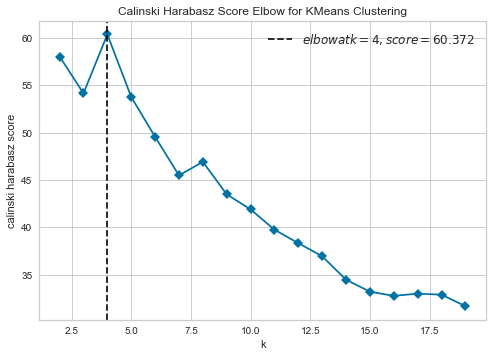

In [350]:
#ELBOW METHOD PARA DEFINIR EL MEJOR K
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(
    km, k=(2,20), metric='calinski_harabasz', timings=False
)

visualizer.fit(data_final.iloc[:,3:])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [269]:
n_clusters = 4

In [270]:
km = KMeans(n_clusters=n_clusters, random_state=0).fit(data_final.iloc[:,3:])

In [271]:
data_final["Cluster"] = km.labels_

In [272]:
data_final.groupby("Cluster").mean()

,Latitude,Longitude,Stats,Likes,Bar,Beer Garden,Building,Cocktail Bar,College Administrative Building,College Auditorium,...,Jewelry Store,Miscellaneous Shop,Night Market,No specified,Office,Radio Station,Strip Club,Sushi Restaurant,Tech Startup,University
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-33.251370,-70.886742,0.142857,0.095238,0.015873,0.015873,0.079365,0.015873,0.015873,0.015873,...,0.0000,0.015873,0.0000,0.047619,0.158730,0.0000,0.015873,0.0000,0.222222,0.031746
1,-34.603045,-71.327262,0.437500,1.625000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,...,0.0625,0.000000,0.0625,0.000000,0.375000,0.0625,0.000000,0.0625,0.000000,0.000000
2,-33.441740,-70.675540,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,1.000000,0.000000
3,-33.391915,-70.687178,2.555556,0.444444,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.0000,0.111111,0.555556,0.0000,0.000000,0.0000,0.111111,0.000000


In [273]:
data_final.groupby("Cluster").Name.count()

Cluster
0    63
1    16
2     1
3     9
Name: Name, dtype: int64

In [301]:
# create map
map_clusters = folium.Map(location=[chile_latitude, chile_longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(data_final['Latitude'], data_final['Longitude'], data_final['Name'], data_final['Cluster']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[round(cluster-1)],
        fill=True,
        fill_color=rainbow[round(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [372]:
print("Cluster 0 (Red)")
data_final.loc[data_final["Cluster"] == 0, "Stats":"Likes" ].sum()

Cluster 0 (Red)


Stats    9
Likes    6
dtype: int64

In [374]:
print("Cluster 1 (Purple)")
data_final.loc[data_final["Cluster"] == 1, "Stats":"Likes" ].sum()

Cluster 1 (Purple)


Stats     7
Likes    26
dtype: int64

In [369]:
data_final.loc[data_final["Cluster"] == 2, "Stats":"Likes" ].sum()

Stats    7
Likes    7
dtype: int64

In [370]:
data_final.loc[data_final["Cluster"] == 3, "Stats":"Likes" ].sum()

Stats    23
Likes     4
dtype: int64

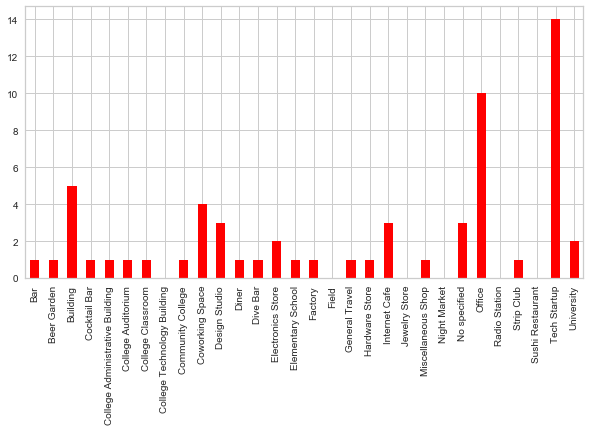

In [353]:
data_final.loc[data_final['Cluster'] == 0, "Bar":"University"].sum().plot(kind="bar", figsize=(10,5), color="red")

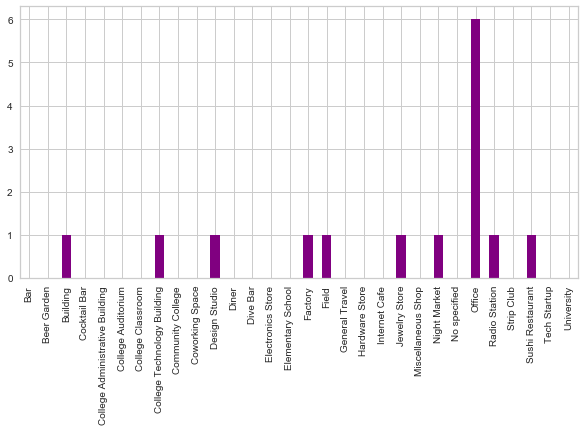

In [354]:
data_final.loc[data_final['Cluster'] == 1, "Bar":"University"].sum().plot(kind="bar", figsize=(10,5), color="purple")

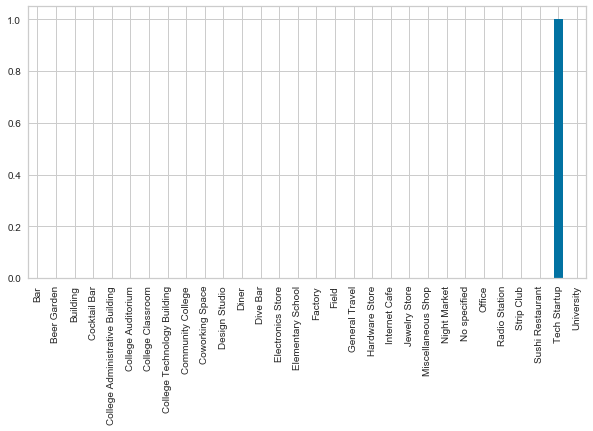

In [355]:
data_final.loc[data_final['Cluster'] == 2, "Bar":"University"].sum().plot(kind="bar", figsize=(10,5))

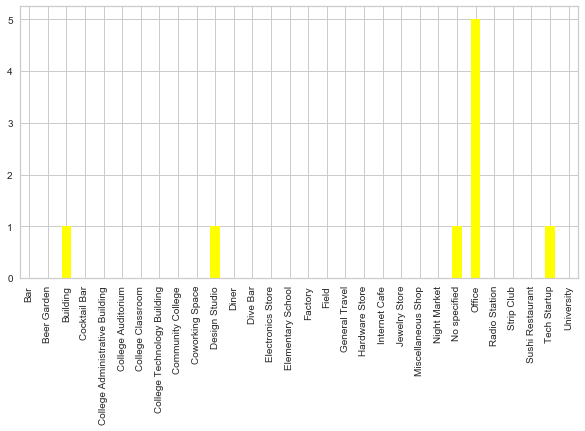

In [356]:
data_final.loc[data_final['Cluster'] == 3, "Bar":"University"].sum().plot(kind="bar", figsize=(10,5), color="yellow")